Build a Student Performance Index Prediction Model Using Multiple Linear Regression.

In [2]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from scratch.linear_algebra import Vector,dot
import tqdm
from scratch.linear_algebra import vector_mean
from scratch.gradient_descent import gradient_step
from scratch.statistics import de_mean

In [3]:
# ===============
# Import data
# ===============

df = pd.read_csv('Student_Performance.csv')
print (f'Dataframe :')
print (f"Rows:{df.shape[0]},  Columns :{df.shape[1]} ")


Dataframe :
Rows:10000,  Columns :6 


In [4]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [5]:
# ==============================
#  Fix Column Titles
# ===============================
print (df.columns)
df.columns=df.columns.str.strip().str.lower().str.replace(" ","_")
print ("Fixed Columns")
print (df.columns)


Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')
Fixed Columns
Index(['hours_studied', 'previous_scores', 'extracurricular_activities',
       'sleep_hours', 'sample_question_papers_practiced', 'performance_index'],
      dtype='object')


In [6]:
df.head()

,hours_studied,previous_scores,extracurricular_activities,sleep_hours,sample_question_papers_practiced,performance_index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   hours_studied                     10000 non-null  int64  
 1   previous_scores                   10000 non-null  int64  
 2   extracurricular_activities        10000 non-null  object 
 3   sleep_hours                       10000 non-null  int64  
 4   sample_question_papers_practiced  10000 non-null  int64  
 5   performance_index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [8]:
# ================================
# Convert the data type of the extracurricular activity column to boolean
# ===============================

print (df["extracurricular_activities"].unique())
bollean={
    "Yes":True,
    "No": False
}
df["extracurricular_activities"]=df["extracurricular_activities"].replace(bollean)
print ("Fixed Change Bollean")
print (df ["extracurricular_activities"].unique())


['Yes' 'No']
Fixed Change Bollean
[ True False]


/tmp/ipykernel_7122/1415718317.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["extracurricular_activities"]=df["extracurricular_activities"].replace(bollean)


In [9]:
df.head()

,hours_studied,previous_scores,extracurricular_activities,sleep_hours,sample_question_papers_practiced,performance_index
0,7,99,True,9,1,91.0
1,4,82,False,4,2,65.0
2,8,51,True,7,2,45.0
3,5,52,True,5,2,36.0
4,7,75,False,8,5,66.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   hours_studied                     10000 non-null  int64  
 1   previous_scores                   10000 non-null  int64  
 2   extracurricular_activities        10000 non-null  bool   
 3   sleep_hours                       10000 non-null  int64  
 4   sample_question_papers_practiced  10000 non-null  int64  
 5   performance_index                 10000 non-null  float64
dtypes: bool(1), float64(1), int64(4)
memory usage: 400.5 KB


In [11]:
analyst=df.describe()
analyst

,hours_studied,previous_scores,sleep_hours,sample_question_papers_practiced,performance_index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [12]:
# =========================
# Central Tendency Analysis
# =========================

# 1. mean
columns=[i for i in analyst.keys()]
means =[i for i in analyst.loc["mean"]]

mean={
    "Columns":columns,
    "means": means
}
dfMean= pd.DataFrame(mean)
print("Table of Means")
dfMean


Table of Means


,Columns,means
0,hours_studied,4.9929
1,previous_scores,69.4457
2,sleep_hours,6.5306
3,sample_question_papers_practiced,4.5833
4,performance_index,55.2248


In [13]:
# 2. Median
valueMedian=[]
columnsMedian=[]
for column in columns:
    medians=df.sort_values(by=column).reset_index(drop=True)
    if len(medians)%2==0:
        median=len(medians)/2
        num_1=medians.loc[median,column]
        num_2=medians.loc[median+1,column]
        medianNum=(num_1+num_2)/2
        columnsMedian.append(column)
        valueMedian.append(medianNum)

dataMedian={
    "columns":columnsMedian,
    "Median":valueMedian
}
dfMedian=pd.DataFrame(dataMedian)

    
    


In [14]:
print("Table of Medians")
dfMedian

Table of Medians


,columns,Median
0,hours_studied,5.0
1,previous_scores,69.0
2,sleep_hours,7.0
3,sample_question_papers_practiced,5.0
4,performance_index,55.0


In [15]:
# Mode or modus
modeColumns=[]
modeValue=[]
for column in columns:
    counts=Counter(df [column])
    var,val =counts.most_common(1)[0]
    modeColumns.append(column)
    modeValue.append(var)

dfMode={
    "columns":modeColumns,
    "mode": modeValue
}
dfMode=pd.DataFrame(dfMode)

In [16]:
print ("Table of Modes")
dfMode

Table of Modes


,columns,mode
0,hours_studied,1.0
1,previous_scores,54.0
2,sleep_hours,8.0
3,sample_question_papers_practiced,6.0
4,performance_index,67.0


In [17]:
#==============================
# Polpulation Variansi
# =============================
columnPopulation=[]
valuePopulation=[]
for column in columns :
    mean = np.mean(df [column])
    popVars=[]
    for i in df[column]:
         popVar =np.square(i-mean)
         popVars.append(popVar)
    
    populationVarians=np.sum(popVars)/len(df[column])
    columnPopulation.append(column)
    valuePopulation.append(populationVarians)

dfPopulationVar={
    "columns":columnPopulation,
    "population_variansi":valuePopulation
}
dfPopulationVar=pd.DataFrame(dfPopulationVar)


    

In [18]:
print ("Table of Population Varians")
dfPopulationVar

Table of Population Varians


,columns,population_variansi
0,hours_studied,6.703850
1,previous_scores,300.754852
2,sleep_hours,2.875664
3,sample_question_papers_practiced,8.220861
4,performance_index,369.085465


In [19]:
# =======================
# STD (Standard Deviation)
# =======================

analyst 

,hours_studied,previous_scores,sleep_hours,sample_question_papers_practiced,performance_index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [20]:
valueStd =[]

for column in columns :
   
    val=analyst.loc ["std",column]
    valueStd.append(val)

dfStd ={
    "columns": columns,
    "Std": valueStd
}
dfStd=pd.DataFrame(dfStd)

In [21]:
print ("Table  of Standar Deviations")
dfStd

Table  of Standar Deviations


,columns,Std
0,hours_studied,2.589309
1,previous_scores,17.343152
2,sleep_hours,1.695863
3,sample_question_papers_practiced,2.867348
4,performance_index,19.212558


In [22]:
# =========================================

In [22]:
# ==========================
# Visualisation
# ===========================

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   hours_studied                     10000 non-null  int64  
 1   previous_scores                   10000 non-null  int64  
 2   extracurricular_activities        10000 non-null  bool   
 3   sleep_hours                       10000 non-null  int64  
 4   sample_question_papers_practiced  10000 non-null  int64  
 5   performance_index                 10000 non-null  float64
dtypes: bool(1), float64(1), int64(4)
memory usage: 400.5 KB


Hours Studied vs Performance Index


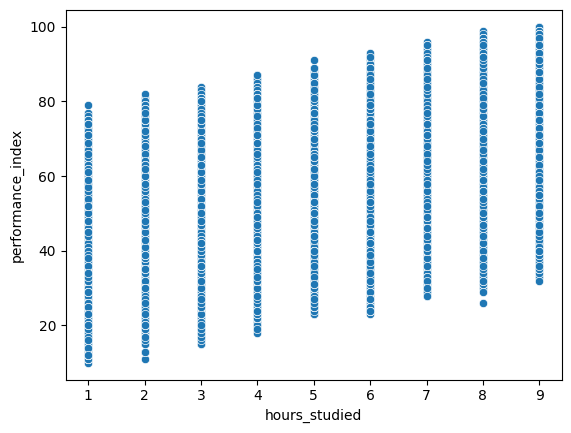

In [24]:
# Relation Between Each Varible and the Performance Index
# Hours Studied vs Performance Index

print ("Hours Studied vs Performance Index")
sns.scatterplot(df,x="hours_studied",y="performance_index")
plt.show()

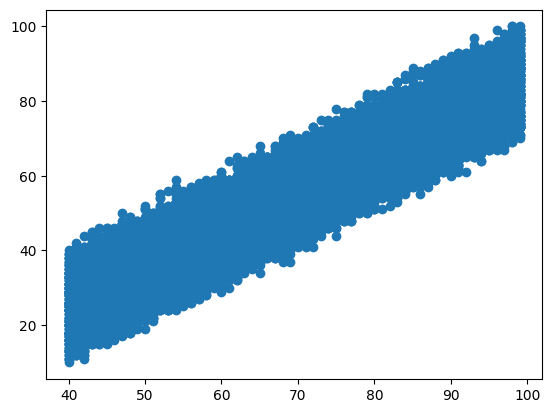

In [25]:
# Previous Score Vs Index
x =df['previous_scores']
y=df['performance_index']
plt.scatter (x,y)
plt.show()

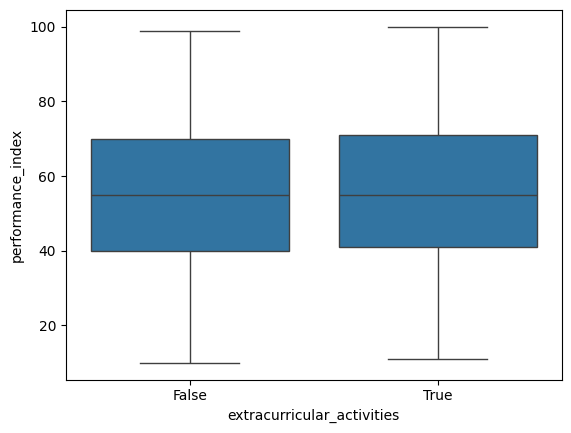

In [26]:
# Extra culicular activities 
sns.boxplot(df,x="extracurricular_activities",y="performance_index")
plt.show()

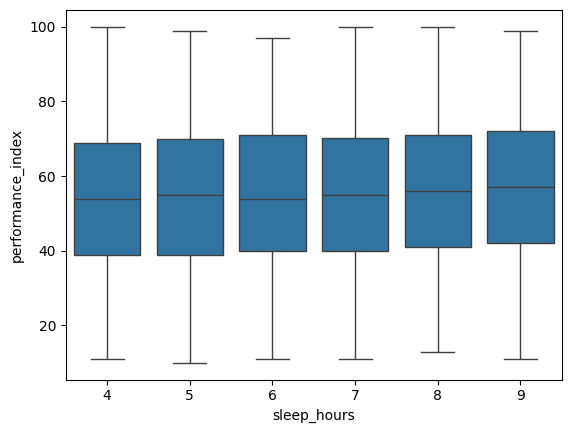

In [27]:
# sleep Hours
sns.boxplot(df,x='sleep_hours',y='performance_index')
plt.show()

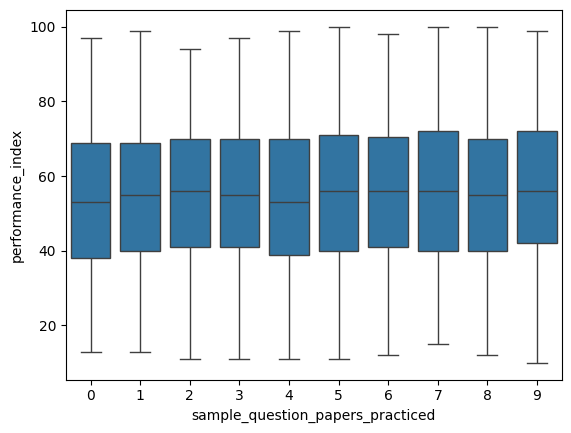

In [28]:
# sample_question_papers_practiced 
sns.boxplot(df,x="sample_question_papers_practiced",y="performance_index")
plt.show()

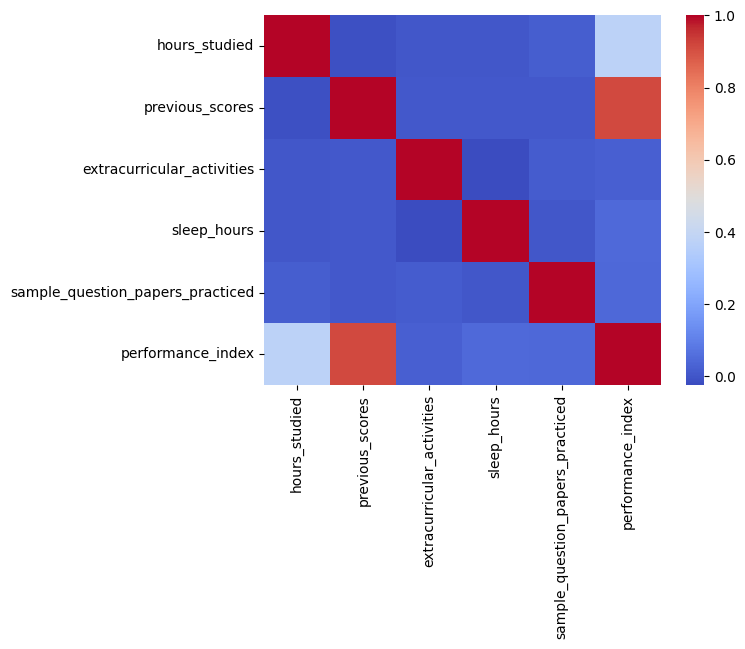

In [29]:
corr=df.corr()
sns.heatmap(corr,annot=False, cmap='coolwarm')
plt.show()

Conclusion of the Analysis
1. The hours and previous_score variables have a linear relationship with the performance_index. 
2. The extracurricular activities, sleep_hours, and sample_question_papers_practiced variables do not have a significant impact on the performance index

In [30]:
df['extracurricular_activities'].unique()
bool=[]
for i in df['extracurricular_activities']:
    if i == True :
        bool.append(1)
    else :
        bool.append(0)
df["extracurricular_activities"]=bool
df.head()

,hours_studied,previous_scores,extracurricular_activities,sleep_hours,sample_question_papers_practiced,performance_index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [31]:
df.columns.tolist()

['hours_studied',
 'previous_scores',
 'extracurricular_activities',
 'sleep_hours',
 'sample_question_papers_practiced',
 'performance_index']

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   hours_studied                     10000 non-null  int64  
 1   previous_scores                   10000 non-null  int64  
 2   extracurricular_activities        10000 non-null  int64  
 3   sleep_hours                       10000 non-null  int64  
 4   sample_question_papers_practiced  10000 non-null  int64  
 5   performance_index                 10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


In [33]:
df['previous_scores'].min()

np.int64(40)

In [34]:
# featuring data
df["previous_scores"]=df["previous_scores"]-df["previous_scores"].mean()

In [35]:
# Choise x value and y value

X=df[df.columns[:-1]]
Y=df[df.columns[-1]]
# Change To List[Vector]
def variable(X,Y):
    xs=X.values.tolist()
    xs =[[1]+ i for i in xs ]
    ys=Y.values.tolist()
    assert len(xs)==len(ys)
    assert len(ys)==len(xs)
    return xs,ys

xs,ys =variable(X,Y)


In [ ]:
# split data
x_train,x_test,y_train,y_test =train_test_split(xs,ys,test_size=0.25,random_state=42)


In [37]:
# predict value
def predict (x:Vector,beta:Vector):
    assert len(x)==len(beta)
    return dot (x,beta)

def error (x:Vector,beta:Vector,y:float):
    return predict(x,beta)-y

def error_gradient (x:Vector,y:float,beta:Vector):
    err =error(x,beta,y)
    return [2*err*x_i for x_i  in x]

# Mean Absolute Error
def mae(xs:list[Vector],ys:list[Vector],beta:Vector):
    return sum(abs(error(x,beta,y))for x,y in zip (xs,ys))/len(ys)

def MSE (xs:list[Vector],ys:list[Vector],beta:Vector):
    sq_error=sum(error (x,beta,y)**2 for x,y in zip(xs,ys))
    return sq_error/len(ys)

def RMSE( xs:list[Vector],ys:list[float],beta:Vector):
    return (MSE (xs,ys,beta))**0.5

def r_squared(xs:list[Vector],ys:list[float],beta:Vector):
    sum_of_error=sum(error(x,beta,y)**2 for x,y in zip (xs,ys))
    total_sum_of_square=sum(v**2 for v in de_mean(ys))
    return 1-(sum_of_error/total_sum_of_square)

In [38]:
# ================================
# Built Model Multiply Liniear
# ================================

def least_squared_fit(xs:list[Vector],
                      ys:list[float],
                      learning_rate:float=0.001,
                      num_step: int=500,
                      batch_size:int=1):
    # gues random beta 
    length=len(xs[0])
    guess=[random.random() for _ in range( length)]

    assert len (guess)==length
    epoch =[]
    MAE=[]
    # epoch train
    for i in tqdm.trange(num_step,desc="least_squared_fit"):
        for start in range(0,len(xs),batch_size):
            x_batch =xs[start:start+batch_size]
            y_batch = ys[start:start+batch_size]
            gradient = vector_mean([error_gradient(x,y,guess) for x,y in zip(x_batch,y_batch)])
            guess=gradient_step(guess,gradient,-learning_rate)
        epoch.append(i)
        mae =sum(error(x_i,guess,y_i) for x_i,y_i in zip (xs,ys))/len(xs)
        MAE.append(mae)
    return guess


In [40]:
beta =least_squared_fit(x_train,y_train)

least_squared_fit:   0%|          | 0/500 [00:00<?, ?it/s]

least_squared_fit: 100%|██████████| 500/500 [02:14<00:00,  3.73it/s]


In [41]:
print (beta)

[36.62597399087748, 2.8234073765210326, 0.9485522364168084, 0.5282776800138888, 0.5812710383012349, 0.19829781894735274]


In [42]:
print ("result the model")
print ("mae:",mae(x_test,y_test,beta))
print ("MSE:",MSE (x_test,y_test,beta))
print ("RMSE",RMSE(x_test,y_test,beta))
print ("score:",r_squared(x_test,y_test,beta))


result the model
mae: 1.977403576194642
MSE: 6.077000160207193
RMSE 2.465157228293399
score: 0.9835061184937809
